[출처](https://www.datamanim.com/dataset/ADPpb/00/23.html)  
[참고](https://lovelydiary.tistory.com/381)

# 머신러닝
## 1. 온,습도,조도,CO2농도에 따른 객실의 사용유무 판별

**데이터 설명**

- 종속변수 Occupancy, 0: 비어있음 , 1: 사용중
- 데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+
- data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv

### 1.1.1 데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df= pd.read_csv(os.getcwd() + '/problem23.csv')
display(df.head())
print(df.shape)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


(17910, 7)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB


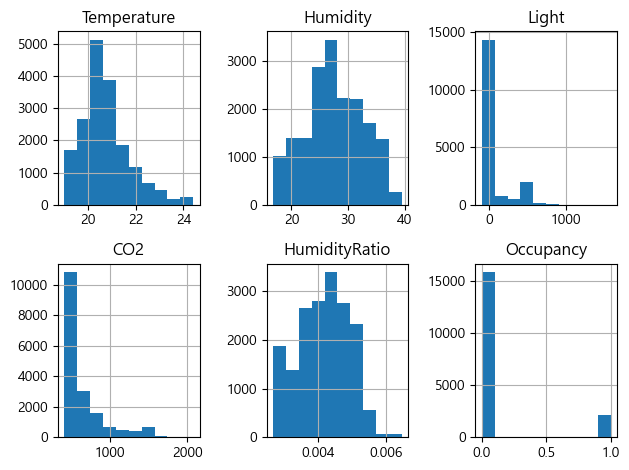

In [13]:
fig, ax = plt.subplots(2, 3)
df.hist(figsize=(5,4), ax=ax)
plt.tight_layout()
plt.show()

In [17]:
df.Occupancy.value_counts()

0    15810
1     2100
Name: Occupancy, dtype: int64

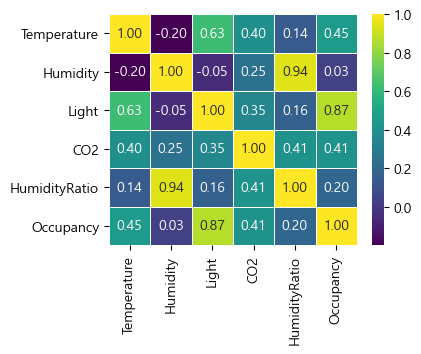

In [41]:
df_corr = df.corr()
plt.figure(figsize=(4,3))
sns.heatmap(df_corr, fmt='.2f', annot=True, cmap='viridis', linewidth=.4)
plt.show()

[해석]
1. 데이터 타입 설명
	- date 컬럼은 object이고, 나머지 컬럼은 float, int형으로 이루어져 있다.
1. 종속변수와 독립변수의 상관관계 설명
	- 종속변수인 Occupancy와 Light 간에 0.87라는 높은 상관성이 나타났다.
1. 독립변수 상관관계 설명
	- HumidityRatio와 Humidity 컬럼 간에 0.94라는 강한 양의 상관관계가 나타났다.
1. 종속변수 분포
	- 종속변수인 Occupancy는 0 또는 1로 이루어져 있으며 0은 15810개, 1은 2100개로 구성되어, 데이터 불균형 문제를 발견하였다.
	- 향후, 이를 해결하기 위해 오버샘플링 또는 언더샘플링 기법을 이용해야할 것으로 판단한다.
1. 독립변수 분포
    - 독립변수 간에 값의 범위가 상이하므로 스케일링을 적용할 필요가 있다.

### 1.1.2 결측치를 대체하는 방식 선택하고 근거제시, 대체 수행
[해석]
- CO2 컬럼에만 21개의 결측치가 존재하며 이를 제거하거나 다른 값으로 대체해야 할 것이다.
- 결측치를 삭제하는 방법보다는 조금의 데이터 손실을 막기위해 평균값으로 대체하였다.

In [61]:
# 결측치 확인
df.isna().sum()

date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64

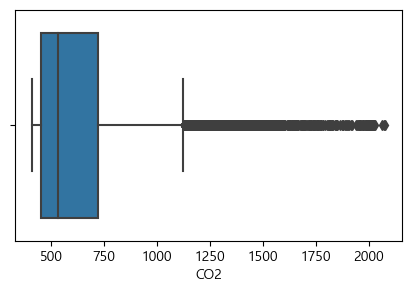

In [62]:
# CO2 상자그림
plt.figure(figsize=(5,3))
sns.boxplot(df['CO2'])
plt.show()

In [65]:
# 결측치를 중앙값으로 대체
df.loc[df['CO2'].isna()==True, 'CO2'] = np.mean(df['CO2'])
df.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

### 1.1.3 추가적으로 데이터의 질 및 품질관리를 향상시킬만한 내용 작성
1. 본 분석에서는 date 컬럼을 제외할 것이지만, 향후 분석에서는 date 컬럼을 날짜형으로 변환하고 연도, 월, 일, 요일 등의 파생변수를 만들어 데이터 양을 확보할 수 있을 것이다.
1.  CO2의 결측치를 평균값으로 대체하였는데, 평균은 이상치의 영향을 많이 받는다. CO2 상자그림을 그리면 이상치가 많이 존재하는데, 평균보다는 이상치의 영향을 평균보다 덜 받는 중앙값으로 대체하면 데이터 질이 향상될 것이다.
1. HumidityRatio와 Humidity 간에 강한 양의 상관관계(0.94)가 있으므로 두 개 변수 중 하나의 변수만 사용하거나 두 변수를 모두 설명할 수 있는 새로운 파생변수를 만들 수 있을 것이다.
1. Light 컬럼 값을 살펴보면 -99 값이 있는데, 기존의 결측치를 -99로 치환한 값으로 판단하였다. 본 분석에서는 이 값을 그대로 유지할 것이지만 실제 현업에서는 분석가들 간 논의를 통해 -99 값을 다른 값로 대체하거나 이 값이 매우 많다면 Light 컬럼을 삭제할 수 있을 것이다.

### 1.2.1 데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성
- 종속변수 Occupancy를 시각화한 결과, 0 값이 1 값보다 압도적으로 많다는 것을 알 수 있다.
- 수치상으로도 차이가 꽤 나기 때문에 데이터 불균형 문제가 발생할 수 있다.
- 따라서 오버샘플링 또는 언더샘플링 기법을 적용해야 할 것이다.

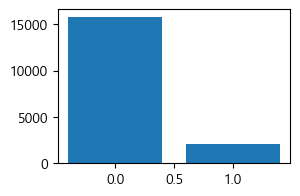

In [75]:
plt.figure(figsize=(3,2))
plt.bar(df.Occupancy.value_counts().index, df.Occupancy.value_counts().values);

In [74]:
df.Occupancy.value_counts()

0    15810
1     2100
Name: Occupancy, dtype: int64

### 1.2.2 오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시
- 오버샘플링 기법에는 '랜덤오버샘플링'과 'SMOTE' 기법이 있다.
- 랜덤오버샘플링 기법
    - 소수의 레이블을 지닌 데이터세트를 단순 복제하여 다수의 레이블과 비율을 맞추는 방법이다.
    - 장점: 데이터 불균형 문제를 해결할 수 있고, 구현이 간단하다.
    - 단점: 종속변수에 대한 고려 없이 데이터를 중복으로 생성하고, 오버피팅의 문제가 있다.
- SMOTE 기법
    - 소수의 레이블을 지닌 데이터세트의 관측값에 대한 K개의 최근접 이웃을 찾고, 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방식으로 데이터를 늘리는 방법이다.
    - 장점: 데이터 불균형 문제를 해결할 수 있고, 데이터의 분포를 고려하여 중복 없이 데이터를 생성한다.
    - 단점: 고차원 데이터에서는 문제가 발생할 수 있다. 랜던 오버 샘플링 기법보다 처리 속도가 느리다.

### 1.2.3 오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라
- 두 오버샘플링 기법을 적용한 결과, 0, 1값 모두 동일한 개수로 설정되었다.
    - 랜덤 오버 샘플링은 0, 1 모두 11067개, SMOTE은 0. 1 모두 15810개로 샘플링되었다.

In [91]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state=1)
rm = RandomOverSampler(random_state=1)

X = df.drop(columns=['Occupancy', 'date'], axis=1)
y = df.Occupancy

# 랜덤오버샘플링
X_rm, y_rm = sm.fit_resample(X, y)
print(Counter(y_sm))

# SMOTE
X_sm, y_sm = sm.fit_resample(X, y)
print(Counter(y_sm))

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 11067, 0: 11067})
Counter({1: 15810, 0: 15810})


### 1.3.1 속도측면, 정확도측면 모델 1개씩 선택, 선택 이유도 기술
- 이진 분류이므로 속도 측면에서는 로지스틱 회귀모델을 선택하였고, 정확도 측면에서는 램덤포레스트를 선택하였다.
- 로지스틱 회귀모델을 선택한 이유는 분류 모델에서 널리 사용되는 이진 분류기이며, 모델 속도가 다른 분류 모델에 비해 빠른 편이기에 선택하였다.
- 랜덤포레스트는 앙상블 기법 중 하나로 배깅, 부스팅보다 더 많은 무작위성을 주어 약한 학습기를 생성한 후에 이를 선형결합하여 최종 학습기를 만드는 모델이다. 따라서 정확도 측면에서 보장할 수 있는 성능을 보이기에 선택하였다.

### 1.3.2 위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import time

# 스케일러 생성
scaler = StandardScaler()

# 원본 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size=0.3)

start = time.time()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

lgr = LogisticRegression(random_state=1)
lgr.fit(X_train_sc, y_train)
print('<원본데이터 로지스틱 회귀모델>')
print('train 정확도: ', lgr.score(X_train_sc, y_train), '\n')
pred_lgr = lgr.predict(X_test_sc)
print(classification_report(y_test, pred_lgr))
print('time: ', time.time() - start, 'sec')

start = time.time()
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train_sc, y_train)
print('\n<원본데이터 랜덤포레스트 모델>')
print('train 정확도: ', clf.score(X_train_sc, y_train), '\n')
pred_clf = clf.predict(X_test_sc)
print(classification_report(y_test, pred_clf))
print('time: ', time.time() - start, 'sec')

<원본데이터 로지스틱 회귀모델>
train 정확도:  0.9869984844859216 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.92      0.98      0.95       630

    accuracy                           0.99      5373
   macro avg       0.96      0.99      0.97      5373
weighted avg       0.99      0.99      0.99      5373

time:  0.10272431373596191 sec

<원본데이터 랜덤포레스트 모델>
train 정확도:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4743
           1       0.96      0.98      0.97       630

    accuracy                           0.99      5373
   macro avg       0.98      0.99      0.98      5373
weighted avg       0.99      0.99      0.99      5373

time:  2.237069845199585 sec


In [106]:
# 랜덤 오버 샘플링 데이터

# 스케일러 생성
scaler = StandardScaler()

X_train_rm, X_test_rm, y_train_rm, y_test_rm = train_test_split(X_rm, y_rm, random_state=1, stratify=y_rm, test_size=0.3)

start = time.time()

X_train_rm = scaler.fit_transform(X_train_rm)
X_test_rm = scaler.transform(X_test_rm)

lgr_rm = LogisticRegression(random_state=1)
lgr_rm.fit(X_train_rm, y_train_rm)
print('<랜덤오버샘플링 데이터 로지스틱 회귀모델>')
print('train 정확도: ', lgr_rm.score(X_train_rm, y_train_rm), '\n')
pred_lgr_rm = lgr_rm.predict(X_test_rm)
print(classification_report(y_test_rm, pred_lgr_rm))
print('time: ', time.time() - start, 'sec')

start = time.time()
clf_rm = RandomForestClassifier(random_state=1)
clf_rm.fit(X_train_rm, y_train_rm)
print('\n<랜덤오버샘플링 데이터 랜덤포레스트 모델>')
print('train 정확도: ', clf_rm.score(X_train_rm, y_train_rm), '\n')
pred_clf_rm = clf_rm.predict(X_test_rm)
print(classification_report(y_test_rm, pred_clf_rm))
print('time: ', time.time() - start, 'sec')

<랜덤오버샘플링 데이터 로지스틱 회귀모델>
train 정확도:  0.9885244420348784 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4743
           1       0.99      0.99      0.99      4743

    accuracy                           0.99      9486
   macro avg       0.99      0.99      0.99      9486
weighted avg       0.99      0.99      0.99      9486

time:  0.16057133674621582 sec

<랜덤오버샘플링 데이터 랜덤포레스트 모델>
train 정확도:  1.0 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4743
           1       0.99      1.00      1.00      4743

    accuracy                           1.00      9486
   macro avg       1.00      1.00      1.00      9486
weighted avg       1.00      1.00      1.00      9486

time:  5.4621100425720215 sec


In [107]:
# SMOTE 데이터

# 스케일러 생성
scaler = StandardScaler()

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, random_state=1, stratify=y_sm, test_size=0.3)

start = time.time()

X_train_sm = scaler.fit_transform(X_train_sm)
X_test_sm = scaler.transform(X_test_sm)

lgr_sm = LogisticRegression(random_state=1)
lgr_sm.fit(X_train_sm, y_train_sm)
print('<SMOTE 데이터 로지스틱 회귀모델>')
print('train 정확도: ', lgr_sm.score(X_train_sm, y_train_sm), '\n')
pred_lgr_sm = lgr_sm.predict(X_test_sm)
print(classification_report(y_test_sm, pred_lgr_sm))
print('time: ', time.time() - start, 'sec')

start = time.time()
clf_sm = RandomForestClassifier(random_state=1)
clf_sm.fit(X_train_sm, y_train_sm)
print('\n<SMOTE 데이터 랜덤포레스트 모델>')
print('train 정확도: ', clf_sm.score(X_train_sm, y_train_sm), '\n')
pred_clf_sm = clf_sm.predict(X_test_sm)
print(classification_report(y_test_sm, pred_clf_sm))
print('time: ', time.time() - start, 'sec')

<SMOTE 데이터 로지스틱 회귀모델>
train 정확도:  0.9885244420348784 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4743
           1       0.99      0.99      0.99      4743

    accuracy                           0.99      9486
   macro avg       0.99      0.99      0.99      9486
weighted avg       0.99      0.99      0.99      9486

time:  0.1516411304473877 sec

<SMOTE 데이터 랜덤포레스트 모델>
train 정확도:  1.0 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4743
           1       0.99      1.00      1.00      4743

    accuracy                           1.00      9486
   macro avg       1.00      1.00      1.00      9486
weighted avg       1.00      1.00      1.00      9486

time:  5.656836986541748 sec


### 1.3.3 위 예측결과 사용해서 오버샘플링이 미친 영향에 대해 작성하라
[해석]
- 로지스틱 회귀모델
    - 원본 데이터로의 train score는 약 0.9869, 소요시간은 약 0.1027초로 나타남.
    - 랜덤 오버 샘플링 기법을 적용한 데이터의 train score는 약 0.9885, 소요시간은 약 0.1605초로 나타남.
    - SMOTE 기법을 적용한 데이터의 train score는 약 0.9885, 소요시간은 약 0.1516초로 나타남.
    - 오버샘플링을 통해 데이터 개수가 원본 데이터 개수보다 증가하였으므로 소요 시간은 오버 샘플링 기법을 적용할 때가 조금 더 오래 걸리는 것으로 나타났으며, train score는 원본 데이터로 구현하였을 때보다 조금 더 향상된 것을 알 수 있다.
    - test 데이터를 측정한 성능 또한 원본 데이터보다 오버 샘플링을 적용한 모델의 성능이 더 높게 나왔다(대부분 0.99 값을 기록함).
    - 따라서 오버샘플링 기법을 적용한 로지스틱 회귀모델과 랜덤포레스트 모델은 데이터의 불균형으로 인한 과적합을 방지하고, 분류 모델의 일반화를 가능하게 했다고 해석할 수 있다.

- 랜덤포레스트
    - 원본 데이터의 train score는 약 1.0, 소요시간은 약 2.2370초로 나타남.
    - 랜덤 오버 샘플링 기법을 적용한 데이터의 train score는 약 1.0, 소요시간은 약 5.4621초로 나타남.
    - SMOTE 기법을 적용한 데이터의 train score는 약 1.0, 소요시간은 약 5.6568초로 나타남.
    - 오버샘플링을 통해 데이터 개수가 원본 데이터 개수보다 증가하였으므로 소요 시간은 오버 샘플링 기법을 적용한 결과가 조금 더 오래 걸렸고, train score에는 차이가 없다.
    - test score를 비교하면, 원본 데이터의 랜덤포레스트의 macro avg, weighted avg는 0.99이며, 오버샘플링 기법을 적용한 모델은 모두 1.0로 나타났다.
    - 랜덤포레스트 모델의 경우, 오버샘플링 기법 적용 전후에 성능 차이가 크게 나지 않았지만, 소요시간에는 오버샘플링을 적용했을 때가 약 3초 더 증가하였다.

---
# 통계분석

## 2 공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오
data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem2.csv

In [1]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem2.csv')
display(df.head())
print(df.shape)

,name,life span
0,sample1,10000
1,sample2,9000
2,sample3,9500
3,sample4,10000
4,sample5,10000


(12, 2)


### 2.1 귀무가설, 연구가설 세우시오.
- 귀무가설: 진공관 수명은 1만 시간이다.
- 대립가설: 진공관 수명은 1만 시간이 아니다.

### 2.2 유효한 데이터의 개수를 구하시오.

In [110]:
# 정규성 검정
import scipy.stats as stats
stats.shapiro(df['life span'])

ShapiroResult(statistic=0.7996643781661987, pvalue=0.00928695872426033)

In [118]:
print('중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다. 그 숫자는 : ',
      df[df['life span']==np.median(df['life span'])].shape[0])

df_fillter = df[df['life span'] != 10000]

print(f'유효한 데이터 개수: {len(df_fillter)}')

중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다. 그 숫자는 :  4
유효한 데이터 개수: 8


### 2.3 검정통계량 및 연구가설 채택 여부를 작성하라
- 주어진 데이터가 정규성을 만족하지 않으므로 t-test가 아닌 윌콕슨 부호 순위 검정을 진행한다.

In [8]:
import scipy.stats as stats
s, p = stats.wilcoxon(df['life span'] - 10_000)
print(f'검정통계량은 {s}이고, p-value(= {round(p, 4)}) > 0.05 이므로 귀무가설을 기각할 수 없기에 진공관 수명은 1만 시간이라고 할 수 있다.')

검정통계량은 8.5이고, p-value(= 0.1829) > 0.05 이므로 귀무가설을 기각할 수 없기에 진공관 수명은 1만 시간이라고 할 수 있다.


## 3. 코로나 시계열 데이터
일자/국가명/확진자수  
데이터 출처(후처리과정 미포함) :https://www.kaggle.com/antgoldbloom/covid19panels?select=country_panel.csv  
데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem3_covid2.csv

In [10]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem3_covid2.csv')
display(df.head())
print(df.shape)

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0


(11895, 3)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11895 entries, 0 to 11894
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   11895 non-null  object 
 1   date       11895 non-null  object 
 2   new_cases  11662 non-null  float64
dtypes: float64(1), object(2)
memory usage: 278.9+ KB


### 3.1 데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라

In [12]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11895 entries, 0 to 11894
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   location   11895 non-null  object        
 1   date       11895 non-null  datetime64[ns]
 2   new_cases  11662 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 278.9+ KB


In [27]:
target = df.groupby(['location', 'date']).sum().groupby(level=0).cumsum()
target.columns = ['cumulative sum']
target = target.reset_index()
target

,location,date,cumulative sum
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,3487.0
2,Austria,2021-01-03,4953.0
3,Austria,2021-01-04,6595.0
4,Austria,2021-01-05,8906.0
...,...,...,...
11890,Vanuatu,2021-10-28,5.0
11891,Vanuatu,2021-10-29,5.0
11892,Vanuatu,2021-10-30,5.0
11893,Vanuatu,2021-10-31,5.0


### 3.2 1에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라) 국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램 작성하라

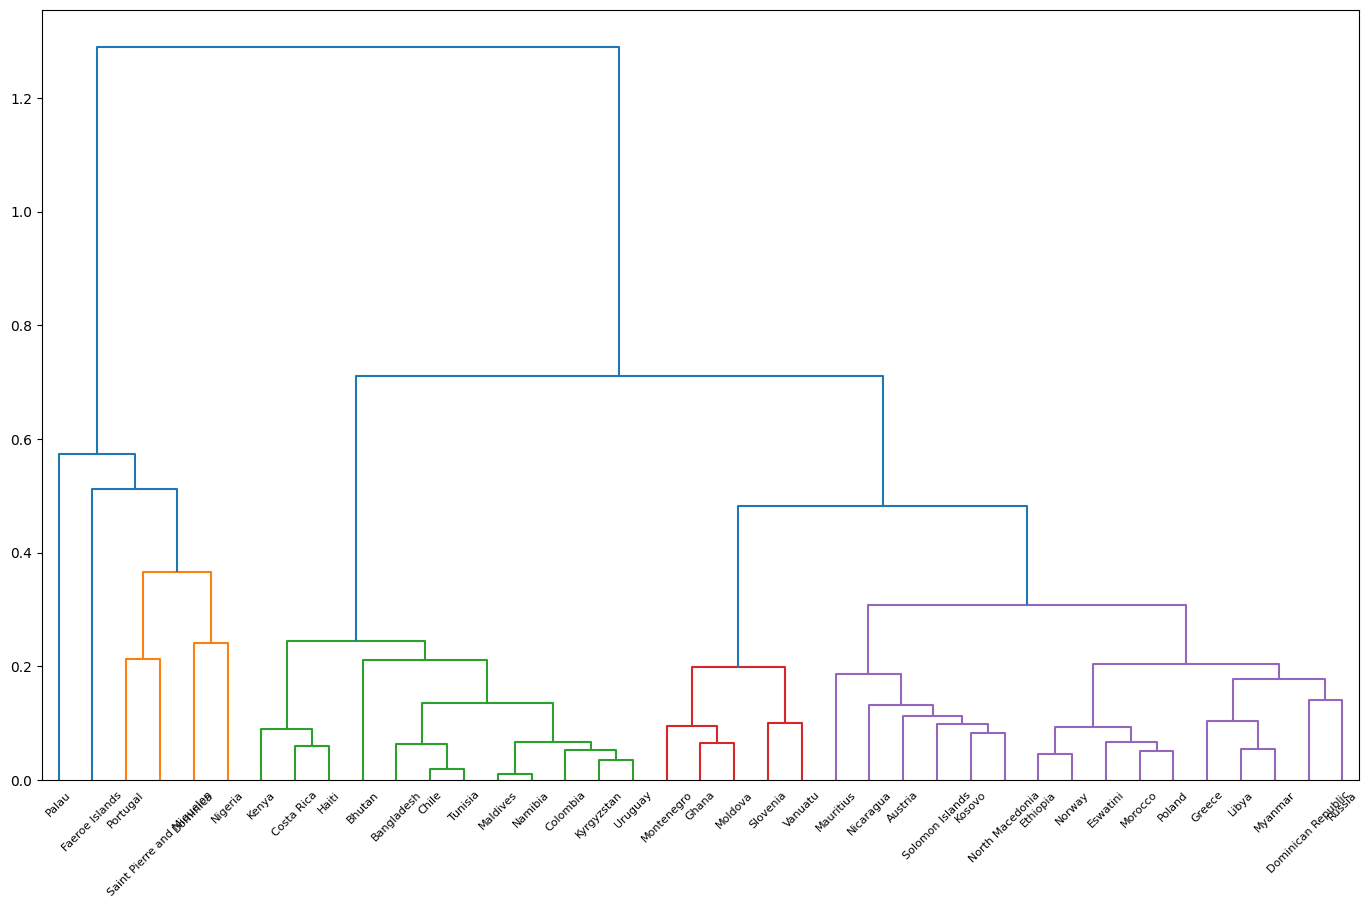

In [40]:
from scipy.spatial import distance
import statsmodels.api as sm
import numpy as np
name =[]
for lo in target.location.unique(): # 나라별로 for문 돌리기
    
    # ACF 계산
    v = sm.tsa.stattools.acf(target[target.location==lo]['cumulative sum'], nlags=50, fft=False) 
    name.append([lo]+list(v[1:]))

v = pd.DataFrame(name)

import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data =v.set_index(0)
label = np.array(data.index)

datav = data.values

fig = plt.figure(figsize=(17,10))

ax3 = fig.add_subplot(1,1,1)
dend3 = linkage(datav, method='average', metric='euclidean')
cutoff = 0.3*max(dend3[:,2])
dend_res3 = dendrogram(dend3, color_threshold=cutoff)
ax3.set_xticklabels(label[dend_res3['leaves']], minor=False)

plt.show()

## 4. 아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라
### 4.1 귀무가설, 대립가설을 세우시오.
귀무가설 : 학과와 성적은 관련이 없다 (독립이다)     
연구가설 : 학과와 성적은 관련이 있다 (독립이 아니다)

### 4.2 학과와 성적이 독립일 경우의 기댓값을 구하시오

In [49]:
df = pd.DataFrame({'사회과학':[15,60,24],'자연과학':[25,69,5],'공학':[10,77,13]})
df.index = ['1.5-2.5','2.5-3.5','3.5-4.5']
df

,사회과학,자연과학,공학
1.5-2.5,15,25,10
2.5-3.5,60,69,77
3.5-4.5,24,5,13


In [55]:
import scipy.stats as stats
s, p, dff, expects = stats.chi2_contingency(df)
print('기댓값:\n', expects)

기댓값:
 [[16.61073826 16.61073826 16.77852349]
 [68.43624161 68.43624161 69.12751678]
 [13.95302013 13.95302013 14.09395973]]


### 4.3 검정통계량 구하고 연구가설의 채택여부 작성

In [66]:
print(f'검정통계량이 {round(s, 5)}이고, p-value 값({round(p,6)})이 0.05보다 작으므로 \
귀무가설을 기각하여 두 변수는 서로 관련이 있다고 할 수 있다.')

검정통계량이 22.13692이고, p-value 값(0.000188)이 0.05보다 작으므로 귀무가설을 기각하여 두 변수는 서로 관련이 있다고 할 수 있다.
